# Accessing all profiles at once 

Conveniently, all the core mision profiles are compated in a single file, named: `<FloatWmoID>_prof.nc` 

**6901254/6901254_prof.nc**

In [2]:
import numpy as np
import xarray as xr
import netCDF4
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
prof  = xr.open_dataset('../../Data/6901254/6901254_prof.nc')

In [7]:
prof

<xarray.Dataset> Size: 566kB
Dimensions:                       (N_PROF: 66, N_PARAM: 3, N_LEVELS: 98,
                                   N_CALIB: 1, N_HISTORY: 0)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     object 8B ...
    FORMAT_VERSION                object 8B ...
    HANDBOOK_VERSION              object 8B ...
    REFERENCE_DATE_TIME           object 8B ...
    DATE_CREATION                 object 8B ...
    DATE_UPDATE                   object 8B ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object 0B ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object 0B ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 0B ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object 0B ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2020-06-25T16:09:47Z creation
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

In this case, N_PROF is 66, since there are 66 profiles, including two for the first cycle, the descending and the ascending. These profiles are just the 'Primary sampling', if you need the high-resolution upper 5 dbar you have to use the individual cycle files ('../../Data/6901254/profiles/R6901254_001.nc' as we show in the previous lesson).

Let's try to visualize all the salinity observations.
First a quick-look 

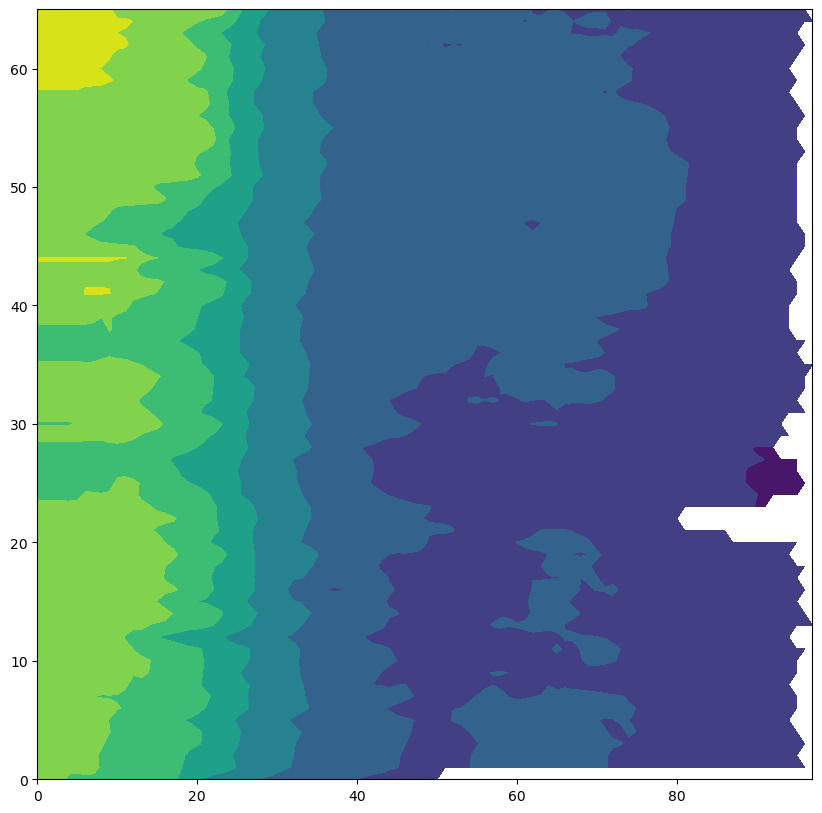

In [8]:
fig , ax = plt.subplots(figsize=(10,10))
ax.contourf(prof.PSAL);

However, if we want to add the proper pressure levels since each profile has slightly different levels. For instance note the different values of the prssure observations for profile 3 and 4:

In [9]:
prof.PRES[3,:].values

array([   6.,    7.,    8.,    9.,   10.,   16.,   25.,   36.,   46.,
         55.,   66.,   76.,   86.,   96.,  106.,  115.,  125.,  135.,
        146.,  156.,  165.,  176.,  186.,  196.,  213.,  237.,  262.,
        288.,  313.,  338.,  363.,  388.,  413.,  438.,  463.,  488.,
        513.,  538.,  563.,  588.,  613.,  638.,  663.,  687.,  713.,
        738.,  763.,  788.,  813.,  838.,  863.,  888.,  914.,  938.,
        963.,  988., 1013., 1038., 1063., 1088., 1113., 1139., 1163.,
       1188., 1213., 1238., 1263., 1288., 1313., 1338., 1363., 1388.,
       1413., 1439., 1463., 1488., 1513., 1538., 1563., 1588., 1613.,
       1638., 1663., 1688., 1713., 1738., 1763., 1788., 1813., 1838.,
       1863., 1888., 1913., 1938., 1963., 1988., 2013., 2036.],
      dtype=float32)

In [10]:
prof.PRES[4,:].values

array([   6.,    7.,    8.,    9.,   10.,   16.,   25.,   35.,   45.,
         55.,   66.,   75.,   85.,   95.,  106.,  116.,  125.,  135.,
        145.,  156.,  165.,  175.,  186.,  196.,  213.,  238.,  263.,
        287.,  313.,  338.,  363.,  388.,  413.,  438.,  463.,  488.,
        513.,  538.,  563.,  588.,  613.,  638.,  663.,  689.,  713.,
        738.,  763.,  788.,  813.,  838.,  863.,  889.,  913.,  938.,
        963.,  988., 1013., 1038., 1063., 1089., 1113., 1138., 1163.,
       1188., 1213., 1238., 1263., 1289., 1313., 1338., 1363., 1388.,
       1413., 1438., 1462., 1488., 1513., 1538., 1563., 1588., 1613.,
       1639., 1663., 1688., 1713., 1737., 1763., 1788., 1813., 1837.,
       1863., 1888., 1913., 1938., 1963., 1978.,   nan,   nan],
      dtype=float32)

Therefore we need to do a little of interpolation to a common set of pressure values:

In [20]:
juld=prof.JULD.values
psal=prof.PSAL.values
temp=prof.TEMP.values
pres=prof.PRES.values
prei=np.arange(5,2005,5) # we define a common set of pressure values:

psali= np.zeros((juld.shape[0],prei.shape[0]))
psali.fill(np.nan)

tempi= np.zeros((juld.shape[0],prei.shape[0]))
tempi.fill(np.nan)

#and we interpolate the salinity onto the new levels:
for ip in range(0,pres.shape[0]-1):
    psali[ip,:]=np.interp(prei,pres[ip,:],psal[ip,:])
    tempi[ip,:]=np.interp(prei,pres[ip,:],temp[ip,:])

and let's plot the time evolution of saliny of this float:

*Unfortunatly we can not teach everything AoS, and therefore we do not explain all the python code, but if you want to get extra information, please make and issue in [GitHub](https://github.com/euroargodev/argoonlineschool/issues)*


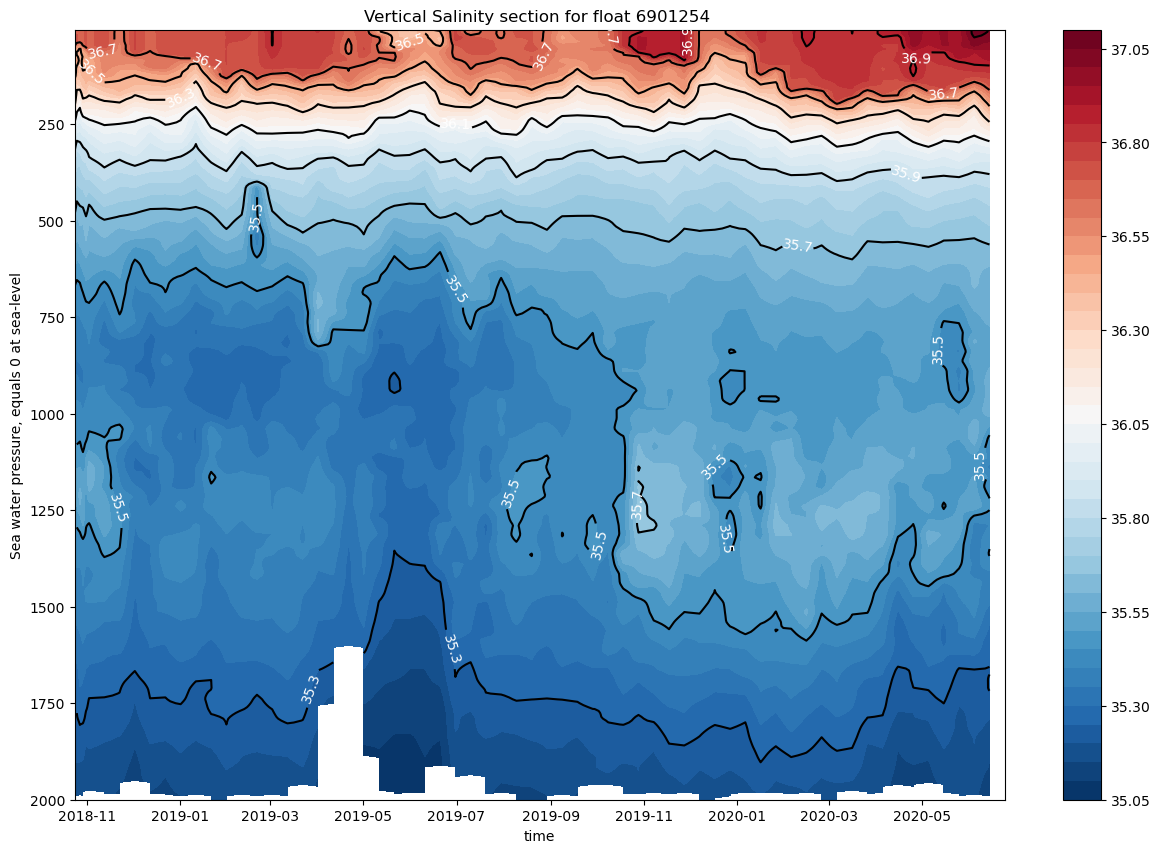

In [21]:
fig, ax = plt.subplots(figsize=(15,10))

cs=ax.contourf(juld,prei,psali.transpose(),40,cmap="RdBu_r")
cs2=ax.contour(juld,prei,psali.transpose(),colors=('k'), levels=cs.levels[::4])

ax.invert_yaxis()
ax.clabel(cs2, fmt='%2.1f', colors='w', fontsize=10)

ax.set_title(f"Vertical Salinity section for float {prof.PLATFORM_NUMBER[0].astype(str).values}")
ax.set_xlabel(f"{prof.JULD.standard_name}")
ax.set_ylabel(f"{prof.PRES.long_name}")

cbar=fig.colorbar(cs,ax=ax)

And the same for temperature:

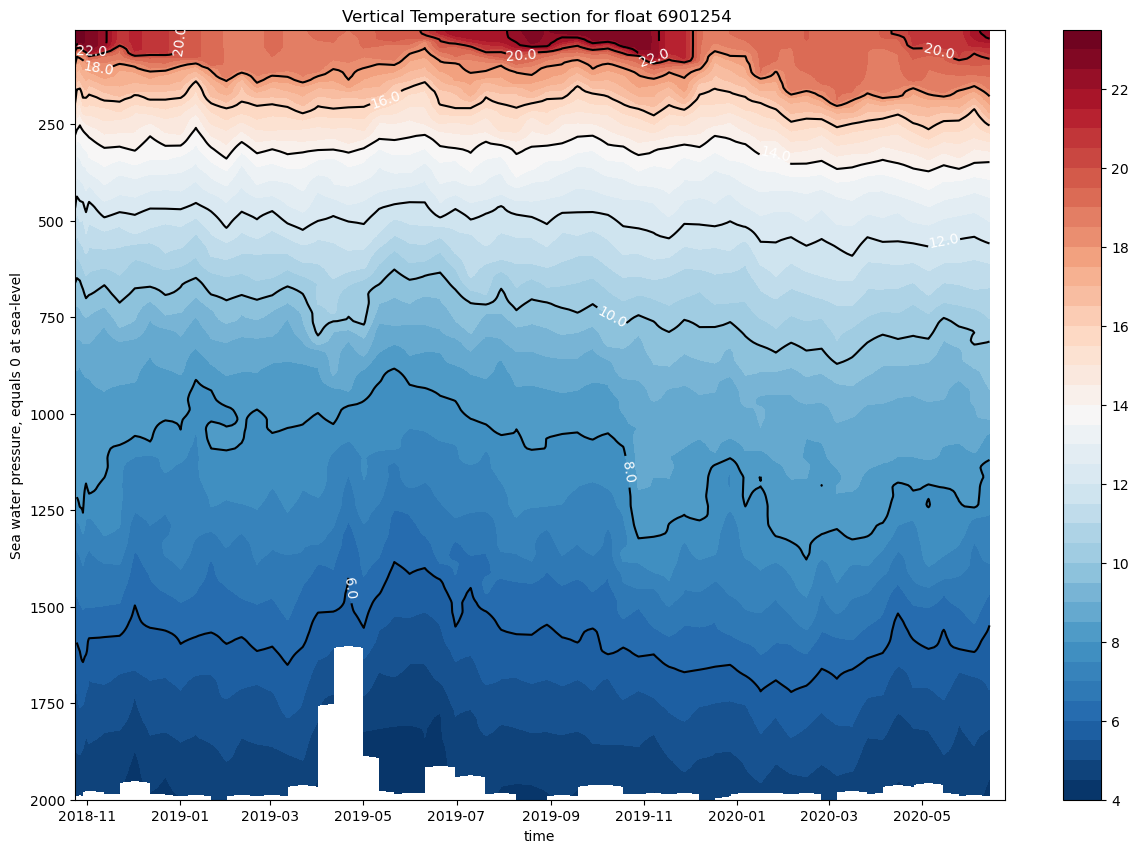

In [22]:
fig, ax = plt.subplots(figsize=(15,10))

cs=ax.contourf(juld,prei,tempi.transpose(),40,cmap="RdBu_r")
cs2=ax.contour(juld,prei,tempi.transpose(),colors=('k'), levels=cs.levels[::4])

ax.invert_yaxis()
ax.clabel(cs2, fmt='%2.1f', colors='w', fontsize=10)

ax.set_title(f"Vertical Temperature section for float {prof.PLATFORM_NUMBER[0].astype(str).values}")
ax.set_xlabel(f"{prof.JULD.standard_name}")
ax.set_ylabel(f"{prof.PRES.long_name}")

cbar=fig.colorbar(cs,ax=ax)

or a TS diagram using the hydrographic data in `TEMP` and `PSAl`

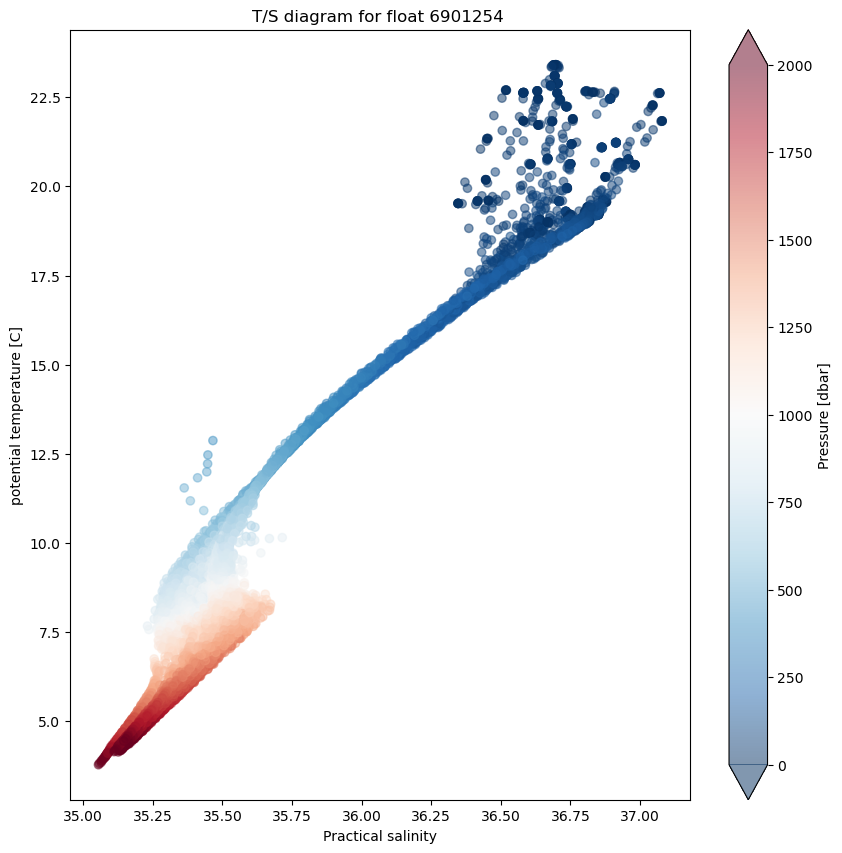

In [24]:
import seawater as sw

temp=prof.TEMP.values.flatten()
psal=prof.PSAL.values.flatten()
pres=prof.PRES.values.flatten()

ptmp=sw.ptmp(psal, temp, pres, pr=0)

t_bins = np.linspace(2, 25, 200)
s_bins = np.linspace(35, 37.25, 200)

hist, xedges, yedges = np.histogram2d(psal, ptmp, (s_bins, t_bins))
xidx = np.clip(np.digitize(psal, xedges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(ptmp, yedges), 0, hist.shape[1]-1)
c = pres ## hist[xidx, yidx]

fig, ax = plt.subplots(figsize=(10,10))
sc=ax.scatter(psal, ptmp, c=c,alpha=0.5, cmap="RdBu_r",vmin=0, vmax=2000)
ax.set_title(f"T/S diagram for float {prof.PLATFORM_NUMBER[0].astype(str).values}")
ax.set_ylabel("potential temperature [C]")
ax.set_xlabel(f"{prof.PSAL.long_name}")
cbar=fig.colorbar(sc,extend='both');
cbar.set_label('Pressure [dbar]')

## Metadata

All the metadata information for each profile is included:

In [26]:
for i1 in range(1,prof.sizes['N_PROF'],10):
    print(f"Cycle {prof.data_vars['CYCLE_NUMBER'].values.astype(int)[i1]}"
          f" Direction {prof.data_vars['DIRECTION'].values.astype(str)[i1]}"
          f" WMO {prof.data_vars['PLATFORM_NUMBER'].values.astype(str)[i1]}"
          f" Data Center {prof.data_vars['DATA_CENTRE'].values.astype(str)[i1]}"   
          f" Project {prof.data_vars['PROJECT_NAME'].values.astype(str)[i1]}" )

Cycle 1 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 11 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 21 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 31 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 41 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 51 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
Cycle 61 Direction A WMO 6901254  Data Center IF Project ARGO SPAIN                                                      
